In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)

In [3]:
wall_series = pd.Series(range(3, 91, 3))
cpu_series = pd.Series([0.94,0.94,1.48,1.65,1.65,1.68,1.68,1.68,1.68,1.68,1.69,1.69,1.69,1.69,1.7,2.27,4.03,5.14,5.9,6.16,7.18,9.04,9.83,9.84,9.84,10.09,11.07,12.76,12.96,12.96])
memory_series = pd.Series([52355072,52355072,54808576,56049664,56049664,56270848,56270848,56270848,56270848,56270848,56270848,56270848,56270848,56270848,56270848,57372672,59535360,59535360,59535360,58884096,59953152,61304832,61304832,60272640,60272640,60272640,60272640,61079552,59830272,59830272])
bytes_read = pd.Series([7773918, 7773918, 8118879, 8118879, 8118879, 8118879, 8118879, 8118879, 8118879, 8118879, 8118879, 8118879, 8446294, 8650070, 9281878, 9472343, 9472343, 9712983, 9712983, 9712983, 9712983, 9712983, 9712983, 9712983, 9712983, 9712983])
bytes_written = pd.Series([0,0,704512,704512,868352,868352,868352,868352,868352,868352,868352,868352,2142208,6676480,14086144,18034688,18436096,20750336,21057536,21057536,21057536,21057536,21057536,21057536,21057536,21057536])
bytes_received = pd.Series([2,2,9968,9968,10111,10111,10111,10111,10111,10111,10111,10111,23403,132723,186216,187772,192749,215438,218978,218978,218978,218978,218978,218978,218978,218978])
bytes_sent = pd.Series([2,2,119,119,1433,1433,1433,1433,1433,1433,1433,1433,33503,182885,232732,232779,241108,272319,272980,272980,272980,272980,272980,272980,272980,272980])

/Users/rkkautsar/.pyenv/versions/3.7.2/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/rkkautsar/.pyenv/versions/3.7.2/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


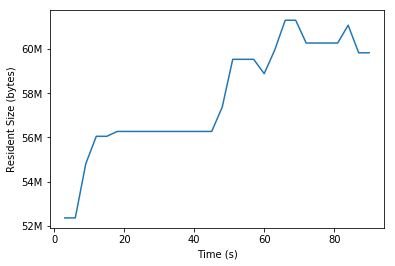

In [4]:
ax = matplotlib.pyplot.gca()
mkfunc = lambda x, pos: '%1.0fM' % (x * 1e-6) if x >= 1e6 else '%1.0fK' % (x * 1e-3) if x >= 1e3 else '%1.0f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)
df = pd.DataFrame(dict(memory=memory_series, wall=wall_series))
sns.lineplot(data=df, y="memory", x="wall", ax=ax)
ax.set(xlabel="Time (s)", ylabel="Resident Size (bytes)")
plt.savefig("perf_rss.pgf")

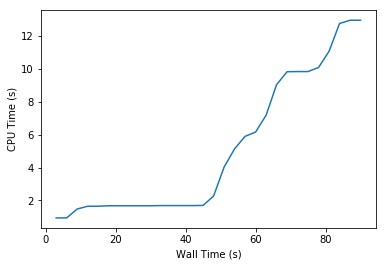

In [5]:
ax = matplotlib.pyplot.gca()
mkfunc = lambda x, pos: '%1.0fM' % (x * 1e-6) if x >= 1e6 else '%1.0fK' % (x * 1e-3) if x >= 1e3 else '%1.0f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)
df = pd.DataFrame(dict(cpu=cpu_series, wall=wall_series))
sns.lineplot(data=df, y="cpu", x="wall", ax=ax)
ax.set(xlabel="Wall Time (s)", ylabel="CPU Time (s)")
plt.savefig("perf_cpu.pgf")

In [6]:
df = pd.DataFrame()
df["Read"] = bytes_read
df["Written"] = bytes_written
df["Received"] = bytes_received
df["Sent"] = bytes_sent

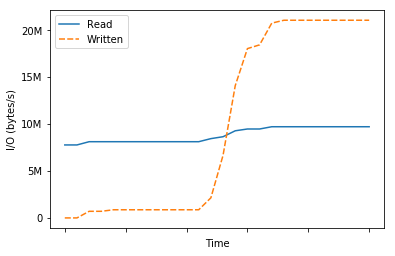

In [7]:
ax = matplotlib.pyplot.gca()
mkfunc = lambda x, pos: '%1.0fM' % (x * 1e-6) if x >= 1e6 else '%1.0fK' % (x * 1e-3) if x >= 1e3 else '%1.0f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)
ax.set(xlabel="Time", ylabel="I/O (bytes/s)", xticklabels=[])

sns.lineplot(data=df[["Read", "Written"]], ax=ax)

plt.savefig("perf_io_rw.pgf")

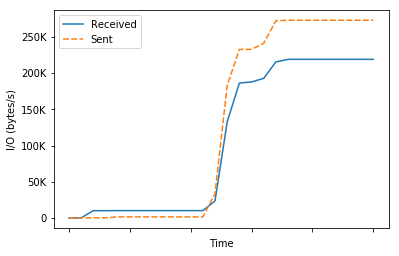

In [8]:
ax = matplotlib.pyplot.gca()
mkfunc = lambda x, pos: '%1.0fM' % (x * 1e-6) if x >= 1e6 else '%1.0fK' % (x * 1e-3) if x >= 1e3 else '%1.0f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)
ax.set(xlabel="Time", ylabel="I/O (bytes/s)", xticklabels=[])

fig = sns.lineplot(data=df[["Received", "Sent"]], ax=ax)


plt.savefig("perf_io_recvsent.pgf")